In [4]:
import sys
import numpy as np
import os
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.python.keras.layers import  Convolution2D, MaxPooling2D
from tensorflow.python.keras import backend as K
import tensorflow as tf
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
K.clear_session()
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [5]:
epocas= 10
longitud, altura = 128, 128
batch_size = 32
filtrosConv1 = 32
filtrosConv2 = 16
tamano_filtro1 = (16, 16)
tamano_filtro2 = (8, 8)
tamano_pool = (4,4)
clases = 4

data_entrenamiento = '/content/dataset/train'
data_validacion = '/content/dataset/test'


# Nueva sección

In [6]:
train = ImageDataGenerator(rescale=1. / 255,rotation_range=15,zoom_range=0.1,brightness_range=(0.2,0.8),shear_range=5)
validation = ImageDataGenerator(rescale=1. / 255)

train_dataset = train.flow_from_directory(
    data_entrenamiento,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='categorical')

validation_dataset = validation.flow_from_directory(
    data_validacion,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='categorical')

train_dataset.class_indices



Found 11775 images belonging to 4 classes.
Found 2835 images belonging to 4 classes.


{'blinking': 0, 'center': 1, 'left': 2, 'right': 3}

In [7]:
cnn = Sequential()
cnn.add(Convolution2D(filtrosConv1, tamano_filtro1, input_shape=(longitud, altura, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=tamano_pool))

cnn.add(Convolution2D(filtrosConv2, tamano_filtro2))
cnn.add(MaxPooling2D(pool_size=tamano_pool))

cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(.5))
cnn.add(Dense(clases, activation='softmax'))

cnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', tf.keras.metrics.Recall()])

history = cnn.fit(
    train_dataset,
    epochs=epocas,
    validation_data=validation_dataset)

target_dir = './modelo/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
cnn.save('modelo.h5')

Epoch 1/10
368/368 [==============================] - 81s 133ms/step - loss: 0.1930 - accuracy: 0.9338 - recall: 0.9108 - val_loss: 0.0570 - val_accuracy: 0.9880 - val_recall: 0.9877
Epoch 2/10
368/368 [==============================] - 47s 128ms/step - loss: 0.0408 - accuracy: 0.9918 - recall: 0.9915 - val_loss: 0.0391 - val_accuracy: 0.9873 - val_recall: 0.9869
Epoch 3/10
368/368 [==============================] - 48s 129ms/step - loss: 0.0286 - accuracy: 0.9947 - recall: 0.9946 - val_loss: 0.0299 - val_accuracy: 0.9915 - val_recall: 0.9908
Epoch 4/10
368/368 [==============================] - 47s 129ms/step - loss: 0.0323 - accuracy: 0.9933 - recall: 0.9932 - val_loss: 0.1296 - val_accuracy: 0.9608 - val_recall: 0.9531
Epoch 5/10
368/368 [==============================] - 47s 129ms/step - loss: 0.0354 - accuracy: 0.9939 - recall: 0.9939 - val_loss: 0.0289 - val_accuracy: 0.9915 - val_recall: 0.9915
Epoch 6/10
368/368 [==============================] - 47s 129ms/step - loss: 0.0230 -

# **GRAFICAS**

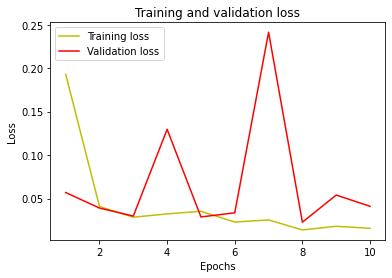

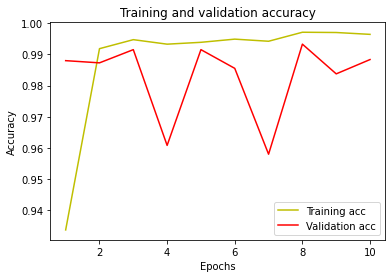

In [8]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **Probar Modelo**

In [9]:
dim = (128,128)
model = load_model('modelo.h5')


blinking = 0
center = 1
left = 2
right = 3

def predict(file):
    x = load_img(file, target_size=dim)
    x = img_to_array(x)
    x = np.expand_dims(x, axis=0)
    array = model.predict(x)
    result = array[0]
    answer = np.argmax(result)
    return answer



aciertos = np.array([0,0,0,0])
total = np.array([0,0,0,0])

opciones = ['blinking','center','left','right']

i = 0
for opcion in opciones:
    dir = 'fotos/' + opcion
    for file in os.listdir(dir):
        if (predict(dir + '/' + file) == i):
            aciertos[i] = aciertos[i] + 1
        total[i] = total[i] + 1
    i = i + 1

for j in range(4):
    print("Tasa de acierto Categoria  ",j, aciertos[j] / total[j])



Tasa de acierto Categoria   0 1.0
Tasa de acierto Categoria   1 1.0
Tasa de acierto Categoria   2 1.0
Tasa de acierto Categoria   3 1.0


In [10]:
dim = (128,128)

blinking = 0
center = 1
left = 2
right = 3

def predict(file):
    x = load_img(file, target_size=dim)
    x = img_to_array(x)
    x = np.expand_dims(x, axis=0)
    array = model.predict(x)
    result = array[0]
    answer = np.argmax(result)
    return answer



aciertos = np.array([0,0,0,0])
total = np.array([0,0,0,0])

opciones = ['blinking','center','left','right']

i = 0
matrix = np.zeros((4,4))
for opcion in opciones:
    dir = 'dataset/test/' + opcion
    for file in os.listdir(dir):
        matrix[predict(dir + '/' + file)][i] = matrix[predict(dir + '/' + file)][i] + 1
        if (predict(dir + '/' + file) == i):
            aciertos[i] = aciertos[i] + 1
        total[i] = total[i] + 1
    i = i + 1

for j in range(4):
    print("Tasa de acierto Categoria  ",j, aciertos[j] / total[j])
    matrix[:,j] = matrix[:,j] / total[j]

print(matrix)

Tasa de acierto Categoria   0 0.995850622406639
Tasa de acierto Categoria   1 0.9962593516209476
Tasa de acierto Categoria   2 0.9827833572453372
Tasa de acierto Categoria   3 0.99836867862969
[[0.99585062 0.00124688 0.01004304 0.00163132]
 [0.         0.99625935 0.00430416 0.        ]
 [0.         0.00124688 0.98278336 0.        ]
 [0.00414938 0.00124688 0.00286944 0.99836868]]


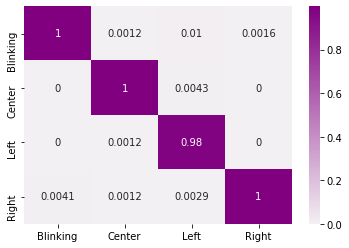

In [11]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

Index= ['Blinking', 'Center', 'Left', 'Right']
Cols = ['Blinking', 'Center', 'Left', 'Right']

np.trunc(matrix)
cm = sns.light_palette("purple", as_cmap=True)
df = DataFrame(matrix, index=Index, columns=Cols)

sns.heatmap(df, annot=True, cmap=cm)

In [12]:
!unzip fotos.zip

Archive:  fotos.zip
replace fotos/blinking/img_202.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [14]:
!nvidia-smi

Thu Jun 10 01:51:17 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    28W /  70W |   1210MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------